<a href="https://colab.research.google.com/github/BFl47/3.2.Fondamenti-AI/blob/main/Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

url='https://drive.google.com/file/d/12dUeEO_rkButPD79pOteFoSSeuIBg5qt/view?usp=drive_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
dataset = pd.read_csv(dwn_url)

# About The Dataset
The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.
The attributes related with eating habits are: Frequent consumption of high caloric food (**FAVC**), Frequency of consumption of vegetables (**FCVC**), Number of main meals (**NCP**), Consumption of food between meals (**CAEC**), Consumption of water daily (**CH20**), and Consumption of alcohol (**CALC**). The attributes related with the physical condition are: Calories consumption monitoring (**SCC**), Physical activity frequency (**FAF**), Time using technology devices (**TUE**), Transportation used (**MTRANS**)
variables obtained :
**Gender**, **Age**, **Height** and **Weight**.

**NObesity** values are:

* Underweight
* Normal
* Overweight
* Obesity I
* Obesity II
* Obesity III

In [ ]:
dataset = dataset.sample(frac=1).reset_index(drop=True)  # per mischiare il dataset
TRAIN_TEST_SPLIT_PERCENTAGE = 0.9
dataset_training = dataset[:int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE)]
dataset_test = dataset[int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE):]

In [ ]:
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,26.000000,1.624576,110.803117,yes,yes,3.000000,3.000000,Sometimes,no,2.704827,no,0.000000,0.269577,Sometimes,Public_Transportation,Obesity_Type_III
1,Male,23.335391,1.713380,82.085549,yes,yes,2.716909,2.598079,Sometimes,no,2.905450,no,1.600431,0.176892,Sometimes,Public_Transportation,Overweight_Level_II
2,Male,39.569004,1.785286,100.431625,yes,yes,2.871768,1.792695,Sometimes,no,2.691322,no,2.545707,0.903903,Frequently,Automobile,Obesity_Type_I
3,Female,24.000000,1.560000,51.000000,no,no,3.000000,3.000000,Frequently,no,2.000000,no,2.000000,2.000000,Frequently,Public_Transportation,Normal_Weight
4,Female,41.823567,1.721854,82.919584,no,yes,2.816460,3.363130,Sometimes,no,2.722063,no,3.000000,0.265790,Sometimes,Automobile,Overweight_Level_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,22.000000,1.700000,66.000000,yes,no,3.000000,3.000000,Always,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
2107,Female,25.998646,1.640741,104.808542,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.190061,0.692343,Sometimes,Public_Transportation,Obesity_Type_III
2108,Male,22.977357,1.839699,120.431551,yes,yes,2.382705,2.938902,Sometimes,no,1.999278,no,1.686229,0.630866,Sometimes,Public_Transportation,Obesity_Type_II
2109,Male,18.000000,1.860000,110.000000,yes,yes,2.000000,1.000000,Sometimes,yes,2.000000,no,1.000000,2.000000,Sometimes,Public_Transportation,Obesity_Type_I


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline

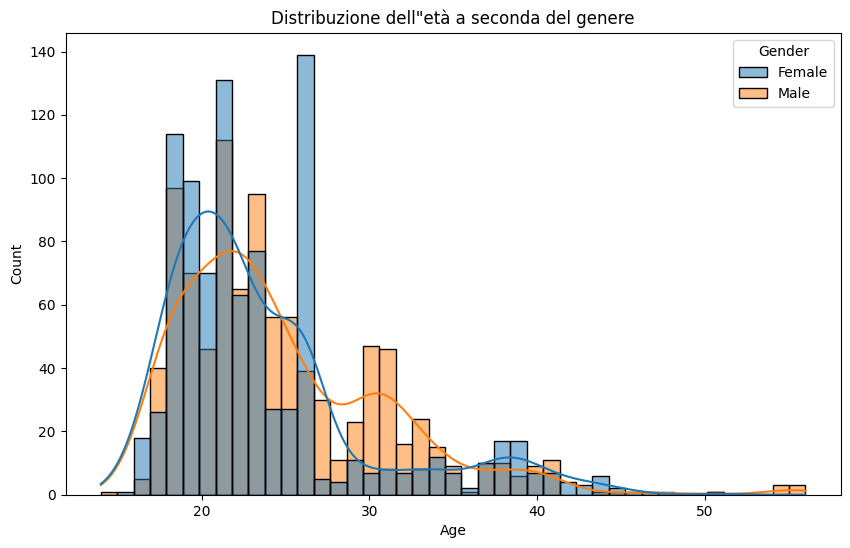

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset_training, x="Age", kde=True, hue="Gender")
plt.title("Distribuzione dell\"età a seconda del genere")
plt.show()

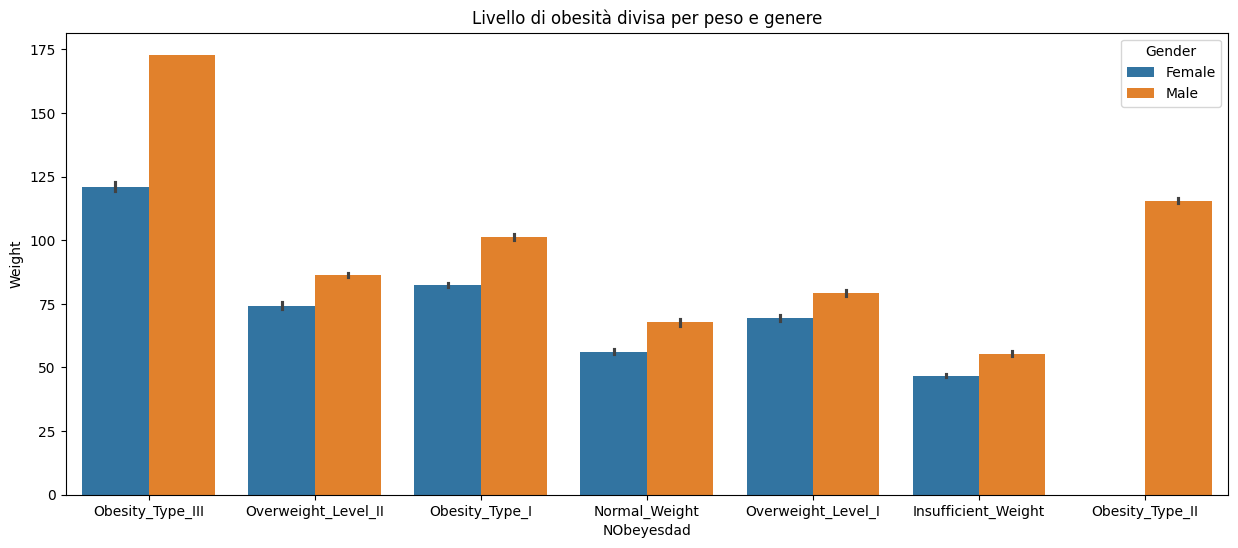

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(data=dataset_training, x="NObeyesdad", y="Weight", hue="Gender")
plt.title("Livello di obesità divisa per peso e genere")
plt.show()

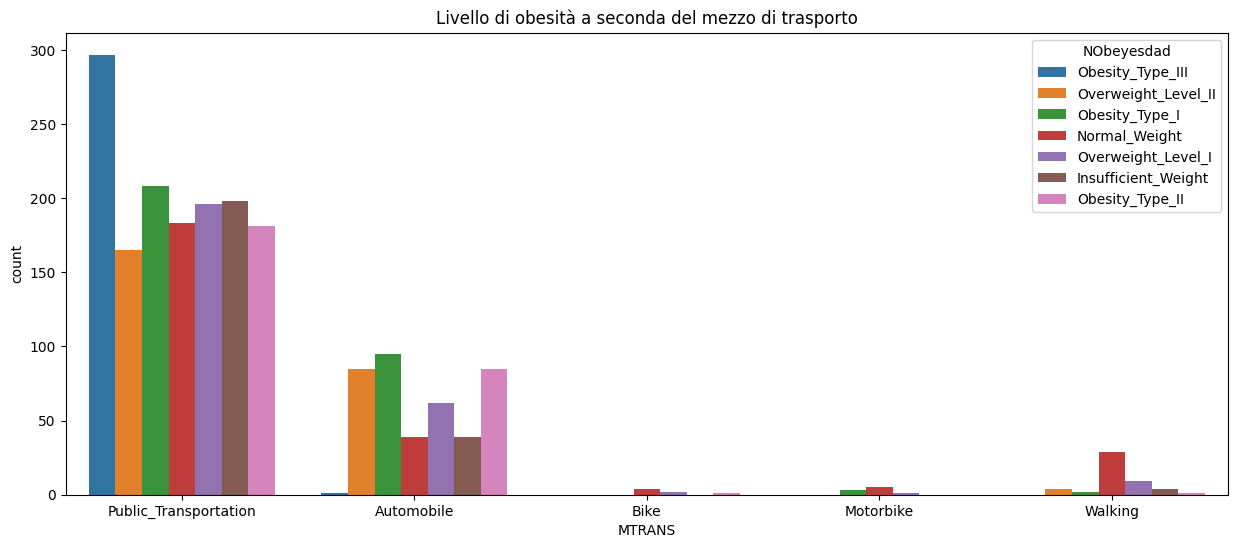

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset_training, x="MTRANS", hue="NObeyesdad")
plt.title("Livello di obesità a seconda del mezzo di trasporto")
plt.show()

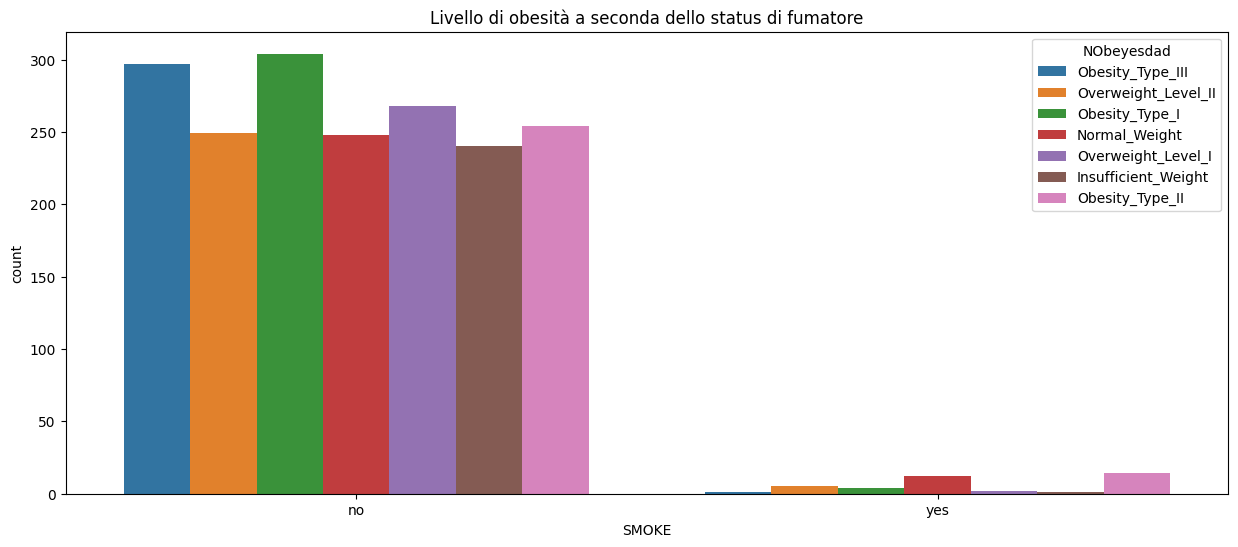

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset_training, x="SMOKE", hue="NObeyesdad")
plt.title("Livello di obesità a seconda dello status di fumatore")
plt.show()

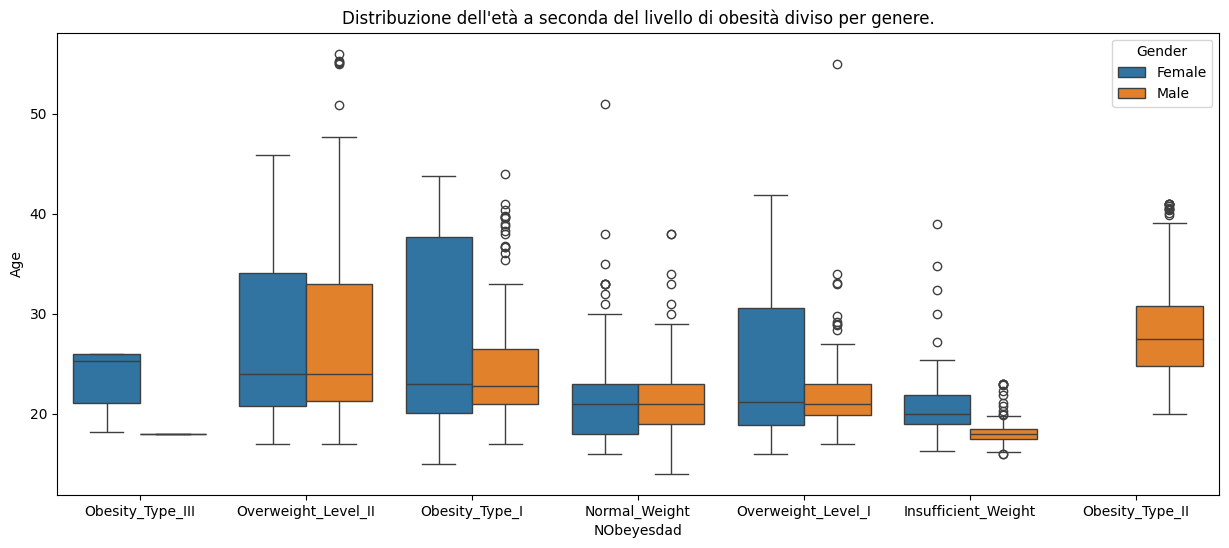

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=dataset_training, x="NObeyesdad", y="Age", hue="Gender")
plt.title("Distribuzione dell'età a seconda del livello di obesità diviso per genere.")
plt.show()

# Regressione Lineare

Assumendo che i dati (samples) vengano generati da un processo stocastico tramite una funzione $f$, l'obiettivo della regressione lineare è trovare una funzione $h$ che approssima il meglio possibile la funzione $f$.
La funzione $h$ per noi rappresenta l'ipotesi sul mondo e il nostro obiettivo è costruire un modello che abbia buone capacità di generalizzazione (giuste previsioni su oggetti non visti in precedenza) e nel contempo permetta di minimizzare l'errore di predizione.

La funzione di Loss da minimizzare è il **Mean Square Error** (di $h$) ed essendo una funzione convessa, la regressione lineare ammette sempre una soluzione, poiché esiste sempre un minimo.

Il procedimento è stato diviso in più parti:
- **Fase di preparazione**

  Tutte le colonne devono essere in forma numerica, quindi ho provveduto a mappare (con un metodo in realtà poco pratico) i valori di ogni attributo.

- **Fase di Training**

  Data X_train, cioè la matrice di design a cui ho aggiunto una colonna in posizione 0 formata da tutti 1 (**colonna di Bias**), è possibile applicare la formula in forma chiusa per minimizzare MSE ottenendo così il vettore dei pesi $c$.
  
  $ c = (X^{T} X)^{-1}X^{T}Y $

- **Fase di Testing**

  Una volta trovato il vettore dei pesi $c$, ho potuto calcolare $Y_{pred}$, utilizzando $X_{test}$, cioè la parte di dataset dedicata al testing. In questo caso, poiché l'obiettivo era predire il vettore dei 'Weight', $Y$ corrisponde al peso predetto per i samples del dataset_test.

  $ Y = c^{T} X $

- **Fase di valutazione**

  Ho infine scelto tre metriche per i problemi di Regressione, cioè MAE, MSE e RMSE.

In [ ]:
# Preparazione dati
def preparazione_dati_linear_regression(X):
  X = np.delete(X, 3, 1)  # elimino la colonna 'Weight' che andrà predetta in fase di test
  rows, cols = X.shape

  for i in range(rows):
    for j in range(cols):
      # Female = 1, Male = 0
      if X[i,0] == 'Female':
        X[i,0] = 1
      elif X[i,0] == 'Male':
        X[i,0] = 0

      # yes = 1, no = 0
      if X[i,j] == 'yes':
        X[i,j] = 1
      elif X[i,j] == 'no':
        X[i,j] = 0

      # no = 0, Sometimes = 1, Frequently = 2, Always = 3
      if X[i,j] == 'Sometimes':
        X[i,j] = 1
      elif X[i,j] == 'Frequently':
        X[i,j] = 2
      elif X[i,j] == 'Always':
        X[i,j] = 3

      # Public_Transportation = 1, Walking = 2, Automobile = 3, Motorbike = 4, Bike = 5
      if X[i,j] == 'Public_Transportation':
        X[i,j] = 1
      elif X[i,j] == 'Walking':
        X[i,j] = 2
      elif X[i,j] == 'Automobile':
        X[i,j] = 3
      elif X[i,j] == 'Motorbike':
        X[i,j] = 4
      elif X[i,j] == 'Bike':
        X[i,j] = 5

      # Underweight = 1, Normal = 2, Overweight I = 3, Overweight II = 4, Obesity I = 5, Obesity II = 6, Obesity III = 7
      if X[i,j] == 'Insufficient_Weight':
        X[i,j] = 1
      elif X[i,j] == 'Normal_Weight':
        X[i,j] = 2
      elif X[i,j] == 'Overweight_Level_I':
        X[i,j] = 3
      elif X[i,j] == 'Overweight_Level_II':
        X[i,j] = 4
      elif X[i,j] == 'Obesity_Type_I':
        X[i,j] = 5
      elif X[i,j] == 'Obesity_Type_II':
        X[i,j] = 6
      elif X[i,j] == 'Obesity_Type_III':
        X[i,j] = 7

  X = np.insert(X, 0, 1, axis=1)  # inserisco la colonna di Bias
  X = X.astype('float64')         # converto tutti i numeri in float per avere uniformità nella matrice

  return X

In [ ]:
# Training
X_train = dataset_training.to_numpy()
Y_train = X_train[:,3]            # Y_train = vettore dei 'Weight'
Y_train = Y_train.astype('float64')

X_train = preparazione_dati_linear_regression(X_train)
X_mp = np.linalg.pinv(X_train)    # X_mp = pseudoinversa di Moore-Pernrose
c = np.dot(X_mp, Y_train)

In [ ]:
# Test
X_test = dataset_test.to_numpy()
Y_test = X_test[:,3]              # Y_test = vettore ground truth, cioè ciò che dovrà predire il modello
Y_test = Y_test.astype('float64')
X_test = preparazione_dati_linear_regression(X_test)

Y_pred = np.dot(X_test, c)        # per ottenere un vettore di dimensioni 212x1 ho effettuato il prodotto tra X_test 212x17 e il vettore c 17x1

In [ ]:
# Valutazione metriche
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)

from math import sqrt
rmse = sqrt(mse)

print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  4.455729421437195
MSE:  35.326144129741316
RMSE:  5.943580076834274


In [ ]:
# Confronto con il modello LinearRegression di sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = sqrt(mse)

# Valutazione metriche
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  4.455729421437195
MSE:  35.32614412974095
RMSE:  5.943580076834244


# Regressione lineare con discesa del gradiente

La Regressione Lineare è risolvibile anche tramite il metodo della discesa del gradiente: si parte da un vettore di pesi random e piano piano si discende lungo la curva nel verso di decrescita del gradiente, finché non si arriva a convergenza.

Regola di aggiornamento: $\ w_i \leftarrow w_i - α \dfrac{\partial}{\partial w_i} Loss(\textbf{w}) $,
dove $ \dfrac{\partial}{\partial w_i} Loss(\textbf{w}) = \dfrac{\partial}{\partial w_i}(y - h_w(x))^{2}  $, cioè il **gradiente dell'MSE**

Applicando la Chain Rule per calcolare la derivata di una funzione composta, si ottiene:

$\ w_i \leftarrow w_i - α (h_w(x) - y)x $

- $α$ rappresenta l'iperparamentro **Learning rate** e solitamente si sceglie pari a $10^{-2}$ o $10^{-3}$

  Nella mia implementazione ho scelto un valore pari a 0.001, poiché volevo evitare il rischio di oscillazioni e quindi instabilità, sapendo che sarei arrivata a convergenza più lentamente.

- uno step di update che copre tutti gli esempi di training viene chiamato **epoca**

  In questo caso ho scelto un numero di epoche pari a 5000 semplicemente come esempio, per evitare che il codice venga eseguito per troppo tempo; infatti, provando ad aumentare il numero di epoche (fino a 10mln con un'esecuzione di 18.54 minuti sulle macchine del laboratorio) si ottengono dei risultati molto simili ai risultati del modello di Regressione lineare ottenuto tramite la forma chiusa.


- per calcolare il gradiente ho utilizzato la seguente formula: $ \dfrac{1}{N}X^{T} (X\cdot{w} - Y) $,

  dove $X\cdot{w} $ calcola le predizioni del modello e $ (X\cdot{w} - Y) $ invece rappresenta l'errore tra predizione e i valori di training corrispondenti all'attributo 'Weight'

Anche in questo caso il procedimento è stato diviso tra fase di Training e fase di Test, con la valutazione tramite le tre metriche scelte anche per la precedente implementazione della Regressione lineare.

Eseguendo 10mln di epoche si ottengono i seguenti risultati:

     MAE:  8.061114794505249
     MSE:  94.52610123348737
     RMSE:  9.722453457512017 (dataset non shuffled)

     MAE:  4.068735635694442
     MSE:  30.226239581531072
     RMSE:  5.497839537630311 (dataset shuffled)

In [ ]:
# Ho riutilizzato le matrici della regressione lineare in forma chiusa,
# definite nel precedente blocco

# Training
w = np.random.rand(17)
X_t = np.transpose(X_train)
esempi = X_train.shape[0]

alpha = 0.001
#epoche = 10000000
epoche = 5000

for e in range(epoche):
    Y_pred = np.dot(X_train, w)
    Y = Y_pred - Y_train

    gradiente = np.dot(X_t, Y) / esempi
    w = w - alpha * gradiente

    loss = 1/(2*esempi) * np.sum(Y**2)
    if e % 100 == 0:
      print("epoca:", e+1, " loss:", loss)

epoca: 1  loss: 2517.537627635393
epoca: 101  loss: 188.66800904435186
epoca: 201  loss: 110.81463307352094
epoca: 301  loss: 76.26705475195891
epoca: 401  loss: 60.65054179886592
epoca: 501  loss: 53.33892480059385
epoca: 601  loss: 49.69435414492388
epoca: 701  loss: 47.68864651757926
epoca: 801  loss: 46.431865859721526
epoca: 901  loss: 45.5312269572378
epoca: 1001  loss: 44.81157421962804
epoca: 1101  loss: 44.19337447533968
epoca: 1201  loss: 43.639369448339664
epoca: 1301  loss: 43.13118476933785
epoca: 1401  loss: 42.65902825603392
epoca: 1501  loss: 42.21712048212148
epoca: 1601  loss: 41.80164467508209
epoca: 1701  loss: 41.40981001873921
epoca: 1801  loss: 41.03941129509974
epoca: 1901  loss: 40.68861276980453
epoca: 2001  loss: 40.35583548174825
epoca: 2101  loss: 40.03969368673012
epoca: 2201  loss: 39.73895570143002
epoca: 2301  loss: 39.45251758145493
epoca: 2401  loss: 39.17938404478311
epoca: 2501  loss: 38.91865381602772
epoca: 2601  loss: 38.66950788134859
epoca: 270

In [ ]:
# Test
Y_pred = np.dot(X_test, w)

In [ ]:
# Valutazione metriche
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = sqrt(mse)

print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  6.381309924226766
MSE:  65.47448567274544
RMSE:  8.091630594184675


#Albero di classificazione binaria
Gli alberi di classificazione binaria sono modelli di ML per risolvere **problemi di classificazione booleana**. Il nostro obiettivo è classificare il dataset basandoci sui livelli di obesità e ottenere in output 0 per valori uguali o al di sotto del sovrappeso e 1 altrimenti.

Principali **funzioni** implementate:
- `learn_decision_tree`: prende in input due sottoinsiemi dei samples (examples, parent_esamples) e una lista di attributi e sfrutta le altre funzioni per costruire ricorsivamente l'albero e restituirlo come output

- `plurality_value`: restituisce la classificazione più comune dell'insieme di input

- `max_gain`: restituisce l'attributo con il gain (importance) massimo tra quelli nella lista degli attributi del sottoinsieme examples corrente

- `entropy`: calcola l'entropia di Shannon

- `prediction`: prende in input un sample e l'albero costruito in precedenza e grazie all'albero restituisce il valore predetto per quell'esempio

- `preparazione_dati_binDT`: effettua la preparazione dei dati, cioè associa a peso, altezze ed età delle categorie e a 'NObeyesdad' valori binari 0/1. Inoltre converte gli altri valori float in interi.

  La scelta del numero di categorie per peso, altezza ed età si è basata sul risultato delle metriche; infatti, ho notato che al diminuire delle categorie l'accuratezza aumentava, quindi sono passata da 5/6 categorie (con accuratezza pari a 0.48) a 10 categorie.
  La necessità di dividere in categorie si è presentata poiché lasciando questi valori come float o come interi, durante la predizione indicava (tramite stampe di controllo) che i valori non erano presenti nell'albero.

Ho scelto di non costruire l'albero utilizzando la libreria anytree, poiché ho riscontrato delle difficoltà soprattutto nella predizione; ho invece optato per un "**albero dizionario**", dove ogni sottoalbero è un dizionario più interno.

Infine ho scelto come **metriche di valutazione**: Accuracy, Matrice di Confusione, Precision, Recall, F1 Score (cioè la media armonica tra Precision e Recall) e AUC.


In [ ]:
# Preparazione dati
def mappa_dati(valore):
  if valore in ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II']:
    return 0
  elif valore in ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']:
    return 1

def mappa_peso(valore):
  if valore < 39:
    return 1
  elif valore < 59:
    return 2
  elif valore < 79:
    return 3
  elif valore < 99:
    return 4
  elif valore < 119:
    return 5
  elif valore < 139:
    return 6
  elif valore < 159:
    return 7
  elif valore < 179:
    return 8
  elif valore < 199:
    return 9
  else:
    return 10

def mappa_eta(valore):
  if valore < 14:
    return 1
  elif valore < 20:
    return 2
  elif valore < 26:
    return 3
  elif valore < 32:
    return 4
  elif valore < 38:
    return 5
  elif valore < 44:
    return 6
  elif valore < 50:
    return 7
  elif valore < 56:
    return 8
  elif valore < 62:
    return 9
  else:
    return 10

def mappa_altezza(valore):
  if valore < 1.45:
    return 1
  elif valore < 1.50:
    return 2
  elif valore < 1.55:
    return 3
  elif valore < 1.60:
    return 4
  elif valore < 1.65:
    return 5
  elif valore < 1.70:
    return 6
  elif valore < 1.75:
    return 7
  elif valore < 1.80:
    return 8
  elif valore < 1.85:
    return 9
  else:
    return 10

def preparazione_dati_binDT(X):
  X['NObeyesdad'] = X['NObeyesdad'].apply(mappa_dati)
  X['Weight'] = X['Weight'].apply(mappa_peso)
  X['Age'] = X['Age'].apply(mappa_eta)
  X['Height'] = X['Height'].apply(mappa_altezza)

  colonne_float = X.select_dtypes(include=['float']).columns
  X[colonne_float] = X[colonne_float].astype(int)                 # Conversione delle colonne float in interi per diminuire il tempo del calcolo del gain
  return X

In [ ]:
from math import log2

def plurality_value(X):
  return X['NObeyesdad'].mode()[0]

def entropy(n, p):
  q = p/(p+n)

  if (q == 0 or q == 1):    # gestisco i casi estremi, per evitare che log2 vada in errore
    return 0

  entropy = -(q * log2(q) + (1-q) * log2(1-q))
  return entropy

def max_gain(X, attributi):
  dizionario_gain = {}

  for attributo in attributi:
    gruppi = X_train.groupby(attributo)
    reminder = 0
    for valore, gruppo in gruppi:
      p_k = gruppo['NObeyesdad'].value_counts().get(1, 0)  # numero esempi positivi nel sottoinsieme
      n_k = gruppo['NObeyesdad'].value_counts().get(0, 0)  # numero esempi negativi nel sottoinsieme
      num_esempi = p_k + n_k                               # tot esempi del sottoinsieme

      reminder_parziale = (num_esempi / tot_esempi) * entropy(n_k, p_k)   # reminder_parziale = termine riferito ad ogni valore dell'attributo
      reminder += reminder_parziale
    dizionario_gain[attributo] = tot_entropy - reminder

  attributo_scelto = max(dizionario_gain, key=dizionario_gain.get)        # cerco la chiave del dizionario_gain relativa al valore massimo

  return attributo_scelto

In [ ]:
def learn_decision_tree(examples, attributes, parent_examples):
  if len(examples) == 0:
    return plurality_value(parent_examples)

  elif examples['NObeyesdad'].isin([0]).all():    # tutti gli elementi hanno NObeyesdad = 0
    return 0

  elif examples['NObeyesdad'].isin([1]).all():    # tutti gli elementi hanno NObeyesdad = 1
    return 1

  elif len(attributes) == 0:
    return plurality_value(examples)

  else:                                        # costruisco l'albero utilizzando un dizionario
    attributo = max_gain(examples, attributes) # attributo con il guadagno massimo
    tree = {attributo: {}}                     # creo un "nodo" per attributo, cioè un dizionario
    valori = examples[attributo].unique()      # lista dei valori di attributo

    for valore in valori:
      exs = examples[examples[attributo] == valore]   # prendo solo gli esempi "e" tali che e.attributo = valore

      new_attributes = attributes.copy()
      new_attributes.remove(attributo)        # attributes - attributo

      subtree = learn_decision_tree(exs, new_attributes, examples)  # costruzione ricorsiva
      tree[attributo][valore] = subtree       # aggiungo il "sottoalbero" subtree a tree

    return tree

In [ ]:
# Training
X_train = dataset_training.copy()
X_train = preparazione_dati_binDT(X_train) # mappo Weight, Age, Height in 10 categorie e Nobeyesdad in valori 0/1

tot_n, tot_p = X_train['NObeyesdad'].value_counts()
tot_entropy = entropy(tot_n, tot_p) # 0.9710736759593659
tot_esempi = tot_n + tot_p          # 1899

attributi = X_train.columns[X_train.columns != 'NObeyesdad']
attributes = attributi.tolist()
albero = learn_decision_tree(X_train, attributes, pd.DataFrame())
# all'iterazione 0 si ha: examples = tutto il dataset X_train,
#                         attributes = tutti gli attributi (tranne l'attributo da predire)
#                         parent_examples = un dataset vuoto

def print_tree(tree, indent=0, height=0):
    for attributo, sottoalbero in tree.items():
        if isinstance(sottoalbero, dict):
            print("  " * indent + str(attributo) + ":")
            print_tree(sottoalbero, indent + 1, height + 1)
        else:
            print("  " * indent + str(attributo) + ": " + str(sottoalbero)  + " (altezza " + str(height) + ")")

# print_tree(albero)          # albero non ottimizzato -> altezza max = 31


In [ ]:
def prediction(esempio, albero):
  pred = 0

  for attributo, sottoalbero in albero.items():   # per ogni attributo controllo i valori della riga (sample) corrente
    valore = esempio[attributo]

    if valore in sottoalbero:                     # il valore è presente
      if isinstance(sottoalbero[valore], dict):   # il sottoalbero contiene un altro dizionario
        pred = prediction(esempio, sottoalbero[valore])
      else:
        pred = sottoalbero[valore]
      break

    #else:                                         # il valore non è presente
    #  print('valore not in sottoalbero')          # stampa di controllo
  return pred

In [ ]:
# Test
X_test = dataset_test.copy()
X_test = preparazione_dati_binDT(X_test)

Y_pred = np.zeros(X_test.shape[0])                # inizializzo Y_pred come un vettore di zeri

i = 0
for index, riga in X_test.iterrows():
  Y_pred[i] = prediction(riga, albero)
  i += 1

In [ ]:
# Valutazione metriche
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score

Y_test = X_test['NObeyesdad']

accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(Y_test, Y_pred)
print("\nMatrice di confusione:")
print(conf_matrix)

precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
print('\nPrecision:', precision, '\nRecall:', recall)

f1 = f1_score(Y_test, Y_pred)
print("\nF1 Score:", f1)

auc = roc_auc_score(Y_test, Y_pred)
print("\nAUC Score:", auc)

Accuracy: 0.9245283018867925

Matrice di confusione:
[[110   4]
 [ 12  86]]

Precision: 0.9555555555555556 
Recall: 0.8775510204081632

F1 Score: 0.9148936170212767

AUC Score: 0.9212316505549588


# Regressione logistica

La regressione logistica è un modello lineare per problemi di classificazione e nel nostro caso, come per il modello precedente, l'obiettivo è classificare i samples in "obeso" o "not obeso" (1 oppure 0).


Molte parti di codice sono state "riciclate" dall'implementazione della regressione lineare, come ad esempio la funzione `preparazione_dati_logistic_regression`e il calcolo del gradiente.

In fase di Training ho utilizzato la **discesa del gradiente** per trovare $w$, cioè il vettore dei pesi (la discesa del gradiente è stata applicata su dati normalizzati, in modo da facilitare la convergenza del modello). In questo caso la scelta dei parametri è stata la seguente:

- alpha (**learning rate**) pari a 0.001 per avere una precisione maggiore ed evitare di divergere o eventuali oscillazioni

- **numero di epoche** pari a 1000 per avere una loss sufficientemente piccola

Successivamente, in fase di Testing, ho calcolato il vettore $ Y_{pred} = Logistic(w \cdot{X}) $, dove $ w⋅X $ è il prodotto interno tra il vettore dei pesi e la matrice di design (con le features normalizzate) e $Logistic$ è la funzione **sigmoide**, in modo tale che $Y$ abbia valori compresi tra 0 e 1; infatti, si può interpretare come la probabilità che un sample abbia l'etichetta pari ad 1.

Dopo aver ottenuto $Y_{pred}$, ho confrontato ogni valore con la soglia data dalla funzione di Threshold $y = 0.5$ per ottenere in output valori booleani (0 oppure 1).

Infine ho utilizzato la valutazione tramite alcune delle metriche per i problemi di classificazione: Accuracy, Matrice di confusione, Precision, Recall, F1 score e AUC. In particolare si può osservare che il modello riesce ad individuare l'88% dei positivi (Recall) e ci si può fidare di una predizione positiva il 79% delle volte (Precision); infatti, dalla Matrice di confusione si evincono 12 falsi positivi e 23 falsi negativi. (I dati potrebbero variare leggermente quando si mischia nuovamente il dataset)

In [ ]:
# Preparazione dati
def preparazione_dati_logistic_regression(X):
  rows, cols = X.shape

  for i in range(rows):
    for j in range(cols):
      # Female = 1, Male = 0
      if X[i,0] == 'Female':
        X[i,0] = 1
      elif X[i,0] == 'Male':
        X[i,0] = 0

      # yes = 1, no = 0
      if X[i,j] == 'yes':
        X[i,j] = 1
      elif X[i,j] == 'no':
        X[i,j] = 0

      # no = 0, Sometimes = 1, Frequently = 2, Always = 3
      if X[i,j] == 'Sometimes':
        X[i,j] = 1
      elif X[i,j] == 'Frequently':
        X[i,j] = 2
      elif X[i,j] == 'Always':
        X[i,j] = 3

      # Public_Transportation = 1, Walking = 2, Automobile = 3, Motorbike = 4, Bike = 5
      if X[i,j] == 'Public_Transportation':
        X[i,j] = 1
      elif X[i,j] == 'Walking':
        X[i,j] = 2
      elif X[i,j] == 'Automobile':
        X[i,j] = 3
      elif X[i,j] == 'Motorbike':
        X[i,j] = 4
      elif X[i,j] == 'Bike':
        X[i,j] = 5

      if X[i,j] in ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II']:
        X[i,j] = 0
      elif X[i,j] in ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']:
        X[i,j] = 1

  Y = X[:,16]                     # Y_train = vettore dei 'NObeyesdad'
  Y = Y.astype(int)               # senza conversione va in errore nel calcolo dell'accuracy
  X = np.delete(X, 16, 1)         # elimino la colonna 'NObeyesdad' che andrà predetta in fase di test
  X = X.astype('float64')         # converto tutti i numeri in float per avere uniformità nella matrice

  return X, Y

In [ ]:
def normalizza(X):
    media = np.mean(X, axis=0)      # calcolo per ogni caratteristica: media
    dev_s = np.std(X, axis=0)       #                                  deviazione standard
    X_norm = (X - media) / dev_s    # riscalo tutti i valori
    return X_norm

def sigmoide(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
# Training
X_train = dataset_training.to_numpy()
X_train, Y_train = preparazione_dati_logistic_regression(X_train)
X_train = np.insert(normalizza(X_train), 0, 1, axis=1)       # normalizzo X_train e inserisco la colonna di Bias

w = np.zeros(17)
X_t = np.transpose(X_train)
esempi = X_train.shape[0]

alpha = 0.001
epoche = 1000

for e in range(epoche):
    Y_pred = sigmoide(np.dot(X_train, w))
    Y = Y_pred - Y_train

    gradiente = np.dot(X_t, Y) / esempi
    w = w - alpha * gradiente

    loss = -np.mean(Y_train * np.log(Y_pred) + (1 - Y_train) * np.log(1 - Y_pred))
    if e % 100 == 0:
       print("epoca:", e+1, " loss:", loss)


epoca: 1  loss: 0.6931471805599453
epoca: 101  loss: 0.6663631535740089
epoca: 201  loss: 0.6422448288704075
epoca: 301  loss: 0.6204790647736553
epoca: 401  loss: 0.60078322253056
epoca: 501  loss: 0.5829061944404133
epoca: 601  loss: 0.5666273581628831
epoca: 701  loss: 0.5517543186189383
epoca: 801  loss: 0.5381200720215505
epoca: 901  loss: 0.5255800128510487


In [ ]:
# Test
X_test = dataset_test.to_numpy()
X_test, Y_test = preparazione_dati_logistic_regression(X_test)
X_test = np.insert(normalizza(X_test), 0, 1, axis=1)          # normalizzo X_test e inserisco la colonna di Bias

Y_pred = sigmoide(np.dot(X_test, w))       # per ottenere un vettore di dimensioni 212x1 ho effettuato il prodotto tra X_test 212x17 e il vettore w 17x1

for i in range(Y_pred.shape[0]):           # applico la soglia della funzione Threshold
  if Y_pred[i] >= 0.5:
    Y_pred[i] = 1
  else:
    Y_pred[i] = 0

In [ ]:
# Valutazione metriche
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(Y_test, Y_pred)
print("\nMatrice di confusione:")
print(conf_matrix)

precision = precision_score(Y_test, Y_pred)
print("\nPrecision:", precision)

recall = recall_score(Y_test, Y_pred)
print("\nRecall:", recall)

f1 = f1_score(Y_test, Y_pred)
print("\nF1 Score:", f1)

auc = roc_auc_score(Y_test, Y_pred)
print("\nAUC Score:", auc)

Accuracy: 0.839622641509434

Matrice di confusione:
[[88 26]
 [ 8 90]]

Precision: 0.7758620689655172

Recall: 0.9183673469387755

F1 Score: 0.8411214953271028

AUC Score: 0.8451485857500894


# K-Nearest Neighbor

La classificazione con K-Nearest-Neighbor, un modello **non parametrico** (come i DT), ci permette di ottenere l'etichetta dei k-oggetti più vicini al sample preso in considerazione. Anche in questo caso il nostro obiettivo è classificare i samples in obesi o non obesi.

Per esprimere il concetto di vicinanza ho utilizzato la **distanza euclidea**, cioè $ ({\sum\mathop{}_{\mkern-5mu i} (x_{j,i} - x_{q,i})^{2}})^{\frac{1}{2}}$

La fase di **Training** consiste nel memorizzare tutti gli esempi in una tabella, X_train, da cui ho rimosso la colonna corrispondente alla feature 'NObeyesdad', cioè $Y_{train}$. Ho utilizzato le seguenti funzioni implementate in precedenza:
- `preparazione_dati_logistic_regression` per ottenere i dati in forma numerica

- `normalizza` utilizzata anche per la regressione logistica per poter avere i dati con un peso simile e quindi comparabili. Infatti, le features sono state normalizzate in modo tale che abbiano una **distribuzione** con media $\ μ = 0$ e deviazione standard $\ σ = 1$

Nella fase di **Testing** invece ho costruito il vettore $Y_{pred}$ andando a calcolare per ogni sample di X_test tutte le distanze dai punti di training, da cui ho estratto gli indici dei k-vicini più vicini, per poter in seguito calcolare la classificazione più comune.

Infine ho applicato le metriche di **valutazione** per i problemi di classificazione, notando che all'aumentare del valore scelto per k, le metriche "peggiorano". Ad esempio:

| Metrica   | k = 1 | k = 3 | k = 5 | k = 9 | k = 13|
|-----------|-------|-------|-------|-------|-------|
| Accurancy | 1.0   | 0.94  | 0.92  | 0.88  | 0.86  |
| Precision | 1.0   | 0.92  | 0.90  | 0.85  | 0.82  |
| Recall    | 1.0   | 0.96  | 0.94  | 0.93  | 0.87  |
| F1 Score  | 1.0   | 0.94  | 0.92  | 0.88  | 0.84  |
| AUC Score | 1.0   | 0.94  | 0.92  | 0.88  | 0.87  |


Ciò non è necessariamente negativo, poiché più aumenta il valore di k e più il Decision Boundary sarà "liscio", non andando a coprire esattamente tutti i punti, ma evitando che il sistema possa overfittare.



In [ ]:
from scipy import stats

def distanza_euclidea(sample1, sample2):
  return np.sqrt(np.sum((sample1 - sample2)**2))

def calcolo_distanze(X, sample):
  distanze = []
  for riga in X_train:
    distanza = distanza_euclidea(sample, riga)
    distanze.append(distanza)
  return distanze

def moda_etichette(k_vicini, Y):
  etichette_k_vicini = []
  for indice in k_vicini:
    etichette_k_vicini.append(Y[indice])
  return stats.mode(etichette_k_vicini).mode

In [ ]:
# Training
X_train = dataset_test.to_numpy()
X_train, Y_train = preparazione_dati_logistic_regression(X_train)
X_train = normalizza(X_train)

In [ ]:
# Test
X_test = dataset_test.to_numpy()
X_test, Y_test = preparazione_dati_logistic_regression(X_test)
X_test = normalizza(X_test)

k = 13
Y_pred = []

for sample in X_test:
  distanze = calcolo_distanze(X_train, sample)
  indici = np.argsort(distanze)                 # indici che ordinerebbero l'array (in ordine crescente)
  k_vicini = indici[:k]                         # ottengo un array con gli indici dei k vicini più vicini
  etichetta = moda_etichette(k_vicini, Y_train)
  Y_pred.append(etichetta)                      # aggiungo a Y_pred l'etichetta più comune

Y_pred = np.array(Y_pred)

In [ ]:
# Valutazione metriche
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(Y_test, Y_pred)
print("\nMatrice di confusione:")
print(conf_matrix)

precision = precision_score(Y_test, Y_pred)
print("\nPrecision:", precision)

recall = recall_score(Y_test, Y_pred)
print("\nRecall:", recall)

f1 = f1_score(Y_test, Y_pred)
print("\nF1 Score:", f1)

auc = roc_auc_score(Y_test, Y_pred)
print("\nAUC Score:", auc)

Accuracy: 0.8962264150943396

Matrice di confusione:
[[101  13]
 [  9  89]]

Precision: 0.8725490196078431

Recall: 0.9081632653061225

F1 Score: 0.89

AUC Score: 0.8970640887934122


# Rete neurale

Una rete neurale è una collezione di layers di neuroni e come per gli altri modelli, l'obiettivo è imparare una funzione $h$ (ipotesi) che più si avvicini alla funzione che la natura implementa, utilizzando l'apprendimento dei dati.

Ho scelto di implementare una rete neurale con un solo layer nascosto e così caratterizzata:

- **Input layer**: contiene un numero di nodi di input pari al numero delle features + 1; infatti, ho aggiunto una colonna di bias in posizione 0 in $X_{train}$ e $X_{test}$

- **Hidden layer**: contiene i neuroni (**hidden units**) che aggregano in modo pesato i valori che provengono dall'input

- **Output layer**: il numero di nodi dipende dal numero di etichette da predire, in questo caso conterrà un solo nodo, poiché il problema è di regressione e si vuole predire il vettore $Y$ del peso corporeo dei nostri samples

- **Funzione di attivazione**: viene applicata ad ogni neurone per introdurre l'elemento della **non linearità**, potrebbe essere diversa da neurone a neurone e/o variare a seconda dal layer. In questo caso ho utilizzato solo la funzione Rectified Linear Unit, cioè $ReLU(x) = max(0, x)$

- **Pesi**: inizializzati randomicamente e standardizzati a una distribuzione normale $\mathcal{N}(0, 0.001)$, per evitare che i gradienti esplodino. In particolare utilizzo due matrici $W_{1}$ e $W_{2}$ che rappresentano rispettivamente i pesi degli archi tra strato input e strato nascosto e tra strato nascosto e strato di output.

- **Funzione di loss**: Il nostro obiettivo è imparare i valori di $W_{1}$ e $W_{2}$, quindi bisogna calcolare i rispettivi gradienti con la backpropagation e aggiornarne il valore. Poiché il problema è di regressione, la funzione di loss scelta è Mean Square Error (MSE).

Durante la **fase di Training** dopo aver inizializzato i pesi, utilizzo le seguenti **funzioni** :

- `forward_pass`: prende in input la matrice $X_{train}$ e i pesi e restituisce il vettore di output

- `calcola_loss`: calcola l'errore quadratico medio tra il vettore target e il vettore predetto

- `back_propagation`: calcola i gradienti per ogni strato usando la chain rule, partendo dal nodo di output ed retropropagando l'errore

- `aggiorna_pesi`: prende in input i pesi, i relativi gradienti e il learning rate e si occupa di aggiornare i pesi

- `rete neurale`: utilizza le precedenti funzioni in modo iterativo effettuando la discesa del gradiente

**Output** della fase di Trainig: pesi ottimizzati

In seguito utilizzo una **grid search** homemade per scegliere i migliori **iperparametri** sulla base del miglior MSE prodotto.

Iperparamentri:

- **numero di iterazioni**, cioè quante volte aggiornare i pesi eseguendo tutti gli step descritti in precedenza

- **dimensione dell'hidden layer**, cioè quanti hidden units inserire nello strato nascosto

- **learning rate**, cioè il tasso di apprendimento, che determina quanto velocemente imparerà il modello

| Iperparametro    | Valori            |
|:-----------------|:-----------------:|
| hidden_size      | 10, 20, 30        |
| num_iterazioni   | 1000, 5000        |
| learning_rate    | 0.001, 0.0001     |


Con questa grid ho ottenuto che gli **iperparametri migliori** sono i seguenti:
      
     hidden_size: 30
     num_iterazioni: 5000
     learning_rate: 0.0001


Successivamente nella **fase di Testing** calcolo il vettore dei pesi $Y_{pred}$ attraverso l'uso degli iperparametri migliori. La funzione `prediction` in questo caso coincide proprio con il `forward_pass`, ma ho preferito diversificarle per mantenere una separazione concettuale.

E infine ho effettuato la **valutazione** attraverso le classiche tre metriche per i problemi di Regressione: MAE, MSE e RMSE.

In [ ]:
def relu(x):
  return np.maximum(0,x)

def inizializza_pesi(input_size, hidden_size, output_size):
  np.random.seed(0)
  W1 = np.random.randn(input_size, hidden_size)                         # matrice dei pesi tra strato di input e strato nascosto
  W2 = np.random.randn(hidden_size, output_size)                        # matrice dei pesi tra strato nascosto e strato di output

  W1 = W1 + np.random.normal(0, 0.001, size = W1.shape)                 # riporto entrambe le matrici ad una distribuzione normale N(0, 0.001)
  W2 = W2 + np.random.normal(0, 0.001, size = W2.shape)

  pesi = {"W1": W1, "W2": W2}                        # dim W1  (17, hidden_size)  dim W2  (hidden_size, 1) -> con X_train
  #print("dim W1 ", W1.shape, "dim W2 ", W2.shape)
  return pesi

def forward_pass(X, pesi):
  W1 = pesi["W1"]
  W2 = pesi["W2"]

  Z1 = np.dot(X, W1)              # output strato nascosto (1899, hidden_size) -> con X_train
  A1 = relu(Z1)

  Z2 = np.dot(A1, W2)             # output strato finale   (1899, 1) -> con X_train
  A2 = relu(Z2)
  return A2

def calcola_loss(Y_pred, Y):                  # Y = target, Y_pred = vettore delle predizioni della rete
  esempi = Y.shape[0]

  loss = np.sum((Y_pred - Y)**2) / (2*esempi)
  return loss

def back_propagation(X, Y, pesi, Y_pred):
  esempi = Y.shape[0]
  W2 = pesi["W2"]
  A1 = relu(np.dot(X, pesi["W1"]))           # (1899, hidden_size) -> con X_train

  # Calcolo gradienti usando la chain rule (rispetto ai pesi della rete)
  dZ2 = Y_pred - Y
  dW2 = np.dot(A1.T, dZ2) / esempi

  dZ1 = np.dot(dZ2, W2.T)
  dW1 = np.dot(X.T, dZ1) / esempi

  gradienti = {"dW1": dW1, "dW2": dW2}
  return gradienti

def aggiorna_pesi(pesi, gradienti, learning_rate):
  pesi["W1"] -= learning_rate * gradienti["dW1"]
  pesi["W2"] -= learning_rate * gradienti["dW2"]

  return pesi

In [ ]:
import warnings

def rete_neurale (X, Y, hidden_size, num_interazioni, learning_rate):
  input_size = X.shape[1]
  output_size = 1
  # print("input_size, output_size ", input_size, output_size)
  pesi = inizializza_pesi(input_size, hidden_size, output_size)

  for i in range(num_interazioni):
    Y_pred = forward_pass(X, pesi)                                    # forward pass

    with warnings.catch_warnings():                                   # ignoro il warning di overflow (per avere stampe più ordinate durante la grid search DIY)
            warnings.simplefilter("ignore", category=RuntimeWarning)
            loss = calcola_loss(Y_pred, Y)                            # calcolo della loss

    gradienti = back_propagation(X, Y, pesi, Y_pred)                  # backpropagation
    pesi = aggiorna_pesi(pesi, gradienti, learning_rate)              # aggiornamento dei pesi

    #if i % 500 == 0:
    #  print("iterazione: ", i+1, "loss: ", loss)

  return pesi

In [ ]:
def prediction(X, pesi):
    W1 = pesi["W1"]
    W2 = pesi["W2"]

    Z1 = np.dot(X, W1)
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2)
    Y_pred = Z2

    return Y_pred

In [ ]:
# Training
X_train = dataset_training.to_numpy()
Y_train = X_train[:,3]                # Y_train = vettore dei 'Weight'
Y_train = Y_train.astype('float64')
Y_train =  Y_train.reshape(-1, 1)     # per passare da (1899,) a (1899,1)

# Preparazione dei dati di training
X_train = preparazione_dati_linear_regression(X_train)       # (1899, 17)

In [ ]:
# grid search DIY
from itertools import product

param_grid = {                              # griglia iperparametri (molto piccola per questioni di tempo di esecuzione)
    'hidden_size': [10, 20, 30],
    'num_iterazioni': [1000, 5000],
    'learning_rate': [0.001, 0.0001]
}

param_combinations = list(product(param_grid['hidden_size'], param_grid['num_iterazioni'], param_grid['learning_rate']))

best_score = 9999                           # inizializzo a 9999 poiché desidero un mse il più piccolo possibile
best_pesi = None
best_model_params = None

for hidden_size, num_iterazioni, learning_rate in param_combinations:
    print("Test combinazione: hidden_size =", hidden_size, "num_iterazioni =", num_iterazioni, "learning_rate =", learning_rate)

    pesi = rete_neurale(X_train, Y_train, hidden_size, num_iterazioni, learning_rate)      # calcolo pesi

    Y_pred = prediction(X_train, pesi)                                                     # calcolo Y_pred con i pesi correnti
    Y_pred_corrente = np.nan_to_num(Y_pred, nan=0.0)

    score = mean_squared_error(Y_train, Y_pred_corrente)                                   # calcolo mse
    print("MSE: ", score)
    print()

    if score < best_score:
        best_score = score
        best_iperparametri = {'hidden_size': hidden_size, 'num_iterazioni': num_iterazioni, 'learning_rate': learning_rate}
        best_pesi = pesi

print("Best iperparametri: ", best_iperparametri)
#print(best_pesi)

Test combinazione: hidden_size = 10 num_iterazioni = 1000 learning_rate = 0.001
MSE:  8226.90328732583

Test combinazione: hidden_size = 10 num_iterazioni = 1000 learning_rate = 0.0001
MSE:  107.07982830083854

Test combinazione: hidden_size = 10 num_iterazioni = 5000 learning_rate = 0.001
MSE:  8226.90328732583

Test combinazione: hidden_size = 10 num_iterazioni = 5000 learning_rate = 0.0001
MSE:  67.50254511920578

Test combinazione: hidden_size = 20 num_iterazioni = 1000 learning_rate = 0.001
MSE:  8226.90328732583

Test combinazione: hidden_size = 20 num_iterazioni = 1000 learning_rate = 0.0001
MSE:  94.43287489224394

Test combinazione: hidden_size = 20 num_iterazioni = 5000 learning_rate = 0.001
MSE:  8226.90328732583

Test combinazione: hidden_size = 20 num_iterazioni = 5000 learning_rate = 0.0001
MSE:  65.4058857123137

Test combinazione: hidden_size = 30 num_iterazioni = 1000 learning_rate = 0.001
MSE:  8226.90328732583

Test combinazione: hidden_size = 30 num_iterazioni = 100

In [ ]:
# Testing
X_test = dataset_test.to_numpy()
Y_test = X_test[:, 3]                           # Colonna dei 'Weight'
Y_test = Y_test.astype('float64')

# Preparazione dei dati di test
X_test = preparazione_dati_linear_regression(X_test)       # (212, 17)

Y_pred = prediction(X_test, best_pesi)

In [ ]:
# Valutazione metriche
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = sqrt(mse)

print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  5.7882582588221325
MSE:  56.47356732868548
RMSE:  7.5148897083513795


# Conclusione

Nella parte iniziale '**About the dataset**' ho utilizzato la funzione `dataset.sample` per **mischiare** il dataset; infatti, inizialmente i dati erano in ordine e questo aveva un impatto enorme sulle performance, soprattutto per i modelli di classificazione, poiché l'ultima parte del dataset non contribuiva all'addestramento. In seguito a questa decisione, la situazione è migliorata notevolmente. Però ho notato un lieve cambiamento nei risultati ad ogni run completa, quindi ad ogni shuffle dei dati. L'ordinamento casuale dei samples ha introdotto una **leggera variazione** nella performance dei vari modelli, perciò i dati riportati nelle tabelle sono solo indicativi.

### Regressione

I modelli per la regressione sono:

- Regressione Lineare
- Regressione Lineare con Gradient Descent
- Rete neurale

L'obiettivo era predire il peso corporeo dei samples.

I risultati migliori sono stati ottenuti dalla Regressione Lineare, nello specifico nella versione che utilizza la forma chiusa; infatti per ottenere lo stesso risultato,  la discesa del gradiente  richiede 10 milione di epoche. Utilizzando un numero di epoche molto basso, invece l'errore aumenta significativamente. Nella tabella ho riportato i risultati relativi a 5000 epoche.
Invece con la rete neurale si ottiene un MSE di circa il doppio rispetto al primo modello; probabilmente aumentando il numero di layer nascosti (facendolo diventare un iperparametro) si poteva ottenere una prestazione migliore. Ma ciò avrebbe sacrificato la semplicità del modello, quindi la **Regressione Lineare** in questo caso sembra essere la scelta migliore.

|                            | MAE    | MSE     | RMSE   |
|----------------------------|--------|---------|--------|
| Regressione Lineare        | 4.2293 | 30.2354 | 5.4986 |
| Regressione Lineare con GD | 6.3813 | 65.4744 | 8.0916 |
| Rete Neurale               | 5.7882 | 56.4735 | 7.5148 |

<br>

### Classificazione

I modelli per la classificazione sono:

- Albero di classificazione binaria
- Regressione Logistica
- k-Nearest Neighbor

L'obiettivo era classificare un sample come obeso o non obeso.

Non considerando il modello K-NN (con K=1), l'albero di classificazione ha ottenuto le migliori prestazioni complessive, ma ho ottenuto una profondità di 31 livelli con un alto rischio di overfitting. Si potrebbe quindi ottimizzare tramite un pruning successivo. La Regressione Logistica è stato il modello più semplice da implementare, ma in questo caso risulta essere il modello meno accurato, comunque con risultati apprezzabili. Il modello K-NN lavora molto bene con questo dataset poiché di piccole dimensioni, ma in generale richiede molti dati, quindi tra i tre probabilmente è il modello maggiormente costoso dal punto di vista computazionale. Inoltre più è piccolo il k e più il modello overfitta, quindi non userei un k=1, nonostante le sue performance siano eccellenti. Si può quindi concludere che in questo caso tra i tre modelli il migliore è il **Binary DT**.

|                       | Accuracy | Precision | Recall | F1 Score | AUC    |
|-----------------------|----------|-----------|--------|----------|--------|
| Binary DT             | 0.9622   | 0.9767    | 0.9333 | 0.9545   | 0.9584 |
| Regressione Logistica | 0.8349   | 0.7909    | 0.8787 | 0.8325   | 0.8376 |
| K-NN (k=1)            | 1        | 1         | 1      | 1        | 1      |
| K-NN (k=13)           | 0.8679   | 0.8229    | 0.8777 | 0.8494   | 0.8692 |

#####Matrici di confusione
<table>
<tr><th>Binary DT </th><th>Regressione Logistica</th><th>K-NN (k=13)</th></tr>
<tr>
<td>

|                  | Predetto: Non Obeso | Predetto: Obeso |
|------------------|---------------------|-----------------|
| Reale: Non Obeso | 120                 | 2               |
| Reale: Obeso     | 6                   | 84              |

</td>
<td>

|                  | Predetto: Non Obeso | Predetto: Obeso |
|------------------|---------------------|-----------------|
| Reale: Non Obeso | 90                  | 23              |
| Reale: Obeso     | 12                  | 87              |

</td>
<td>

|                  | Predetto: Non Obeso | Predetto: Obeso |
|------------------|---------------------|-----------------|
| Reale: Non Obeso | 105                 | 17              |
| Reale: Obeso     | 11                  | 79              |

</td>
</tr>
</table>